In [245]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [246]:
df = pd.read_csv('../data/raw_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.dropna(inplace=True)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [247]:
df.shape

(4250, 20)

In [248]:
num_cols = [col for col in df.columns if df[col].dtypes != 'object']
cat_cols = [col for col in df.columns if df[col].dtypes == 'object']

In [249]:
df[cat_cols].head()

,state,area_code,international_plan,voice_mail_plan,churn
0,OH,area_code_415,no,yes,no
1,NJ,area_code_415,no,no,no
2,OH,area_code_408,yes,no,no
3,OK,area_code_415,yes,no,no
4,MA,area_code_510,no,yes,no


In [250]:
len(list(df['state'].unique()))

51

#### Feature Encoding (For Categorical Columns)

In [251]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

In [252]:
cat_cols

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [253]:
label_encoder = LabelEncoder()

df['international_plan'] = label_encoder.fit_transform(df['international_plan'])

df['voice_mail_plan'] = label_encoder.fit_transform(df['voice_mail_plan'])

df['churn'] = label_encoder.fit_transform(df['churn'])

df['area_code'] = label_encoder.fit_transform(df['area_code'])

In [254]:
target_encoder = ce.TargetEncoder()

df['state'] = target_encoder.fit_transform(X=df['state'], y=df['churn'])

In [255]:
df[cat_cols].head()

,state,area_code,international_plan,voice_mail_plan,churn
0,0.126324,1,0,1,0
1,0.270768,1,0,0,0
2,0.126324,0,1,0,0
3,0.204934,1,1,0,0
4,0.157287,2,0,1,0


#### Segregating Dataset for linear models and tree based models

In [256]:
linear_df = df.copy(deep=True)
tree_df = df.copy(deep=True)

##### Standardisation for linear models

In [257]:
from sklearn.preprocessing import StandardScaler

In [258]:
standard_scalar = StandardScaler()

df[num_cols] = standard_scalar.fit_transform(df[num_cols])
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.126324,0.170399,1,0,1,1.366857,-0.345510,1.163449,-0.345788,-0.093025,0.141841,-0.092493,1.070003,0.157309,1.070820,1.247901,-0.579164,1.248591,-0.426346,0
1,0.270768,0.926186,1,0,0,-0.567911,1.169136,0.710014,1.169295,-1.571820,0.493490,-1.572341,-0.753320,0.207083,-0.752053,0.704379,0.232927,0.698342,-1.188960,0
2,0.126324,-0.409038,0,1,0,-0.567911,2.206058,-1.456398,2.206218,-2.752070,-0.611691,-2.752473,-0.072057,-0.539526,-0.072337,-1.324770,1.045017,-1.328187,0.336268,0
3,0.204934,-0.635774,1,1,0,-0.567911,-0.251076,0.659633,-0.251027,-1.032448,1.096316,-1.031447,-0.270676,1.053239,-0.270956,-0.056552,-0.579164,-0.053219,1.098882,0
4,0.157287,0.523099,2,0,1,1.218029,0.702522,-0.599910,0.702027,2.952139,0.393019,2.951497,0.239775,0.903917,0.241038,-0.998657,1.045017,-0.992669,1.098882,0


#### Model trainning

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [260]:
model_perf = {
    'model' : list(),
    'metrics' : list(),
    'score' : list()
}

##### Linear models

In [261]:
models = {
    'logistic_regression' : (LogisticRegression(), linear_df),
    'svc' : (SVC(), linear_df),
    'random_forest' : (RandomForestClassifier(), tree_df),
    'gradient_boost' : (GradientBoostingClassifier(), tree_df),
    'xgb' : (xgb.XGBClassifier(), tree_df),
    'adaboost' : (AdaBoostClassifier(), tree_df)
}

In [262]:
for model_name, model_n_data in zip(list(models.keys()), list(models.values())):

    # print('model_name : {}, model : {}'.format(model_name, model_n_data[0]))

    data = model_n_data[1]
    model = model_n_data[0]

    X = data.drop('churn', axis=1)
    y = data['churn']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    model_perf['model'].append(model_name)
    model_perf['metrics'].append('accuracy_score')
    model_perf['score'].append(accuracy_score(y_test, y_pred) * 100)

    model_perf['model'].append(model_name)
    model_perf['metrics'].append('f1_score')
    model_perf['score'].append(f1_score(y_test, y_pred) * 100)
    
    model_perf['model'].append(model_name)
    model_perf['metrics'].append('precision_score')
    model_perf['score'].append(precision_score(y_test, y_pred) * 100)

    model_perf['model'].append(model_name)
    model_perf['metrics'].append('recall_score')
    model_perf['score'].append(recall_score(y_test, y_pred) * 100)

    model_perf['model'].append(model_name)
    model_perf['metrics'].append('train_score')
    model_perf['score'].append(model.score(X_train, y_train) * 100)
    

c:\Users\sahil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [263]:
model_perf

{'model': ['logistic_regression',
  'logistic_regression',
  'logistic_regression',
  'logistic_regression',
  'logistic_regression',
  'svc',
  'svc',
  'svc',
  'svc',
  'svc',
  'random_forest',
  'random_forest',
  'random_forest',
  'random_forest',
  'random_forest',
  'gradient_boost',
  'gradient_boost',
  'gradient_boost',
  'gradient_boost',
  'gradient_boost',
  'xgb',
  'xgb',
  'xgb',
  'xgb',
  'xgb',
  'adaboost',
  'adaboost',
  'adaboost',
  'adaboost',
  'adaboost'],
 'metrics': ['accuracy_score',
  'f1_score',
  'precision_score',
  'recall_score',
  'train_score',
  'accuracy_score',
  'f1_score',
  'precision_score',
  'recall_score',
  'train_score',
  'accuracy_score',
  'f1_score',
  'precision_score',
  'recall_score',
  'train_score',
  'accuracy_score',
  'f1_score',
  'precision_score',
  'recall_score',
  'train_score',
  'accuracy_score',
  'f1_score',
  'precision_score',
  'recall_score',
  'train_score',
  'accuracy_score',
  'f1_score',
  'precision_sc

In [264]:
model_perf_df = pd.DataFrame(data=model_perf)

model_perf_df

,model,metrics,score
0,logistic_regression,accuracy_score,84.549020
1,logistic_regression,f1_score,13.973799
2,logistic_regression,precision_score,53.333333
3,logistic_regression,recall_score,8.040201
4,logistic_regression,train_score,87.025210
5,svc,accuracy_score,84.549020
6,svc,f1_score,1.990050
7,svc,precision_score,100.000000
8,svc,recall_score,1.005025
9,svc,train_score,86.689076


#### Observations

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt

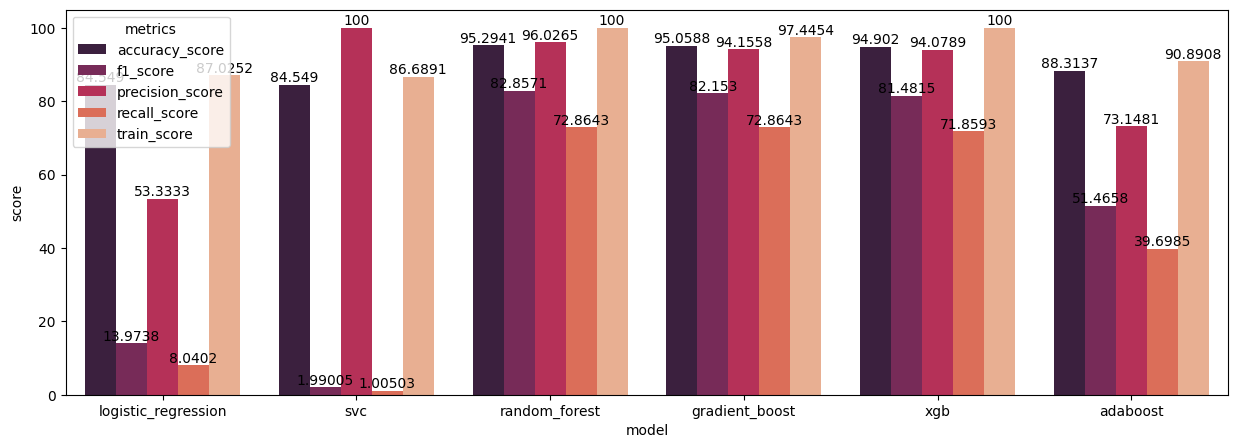

In [266]:
plt.figure(figsize=(15, 5))

ax = sns.barplot(data=model_perf_df, x='model', y='score', hue='metrics', palette='rocket')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

1. Linear models are not performing well for imbalanced dataset.
2. From business point of view we want to create a model which is good at predicting, wheather a customer is going to churn. that is our model should be good at correctly classifying 'yes' class datapoints.
3. So, we want to reduce False Negative (FN) error. That is we do not want our model to say that, a particular customer is not going to churn when in reality the customer churned.
4. Since, we want to reduce FN error we will use recall_score to evalute models.